In [1]:
print()

In [2]:
#Load the dataset
from keras.datasets.cifar10 import load_data
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test Shape:	 (10000, 32, 32, 3) (10000, 1)


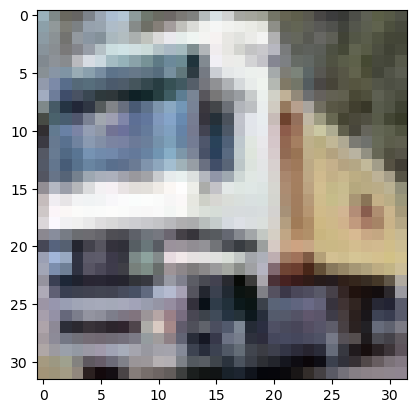

In [25]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='gray_r')

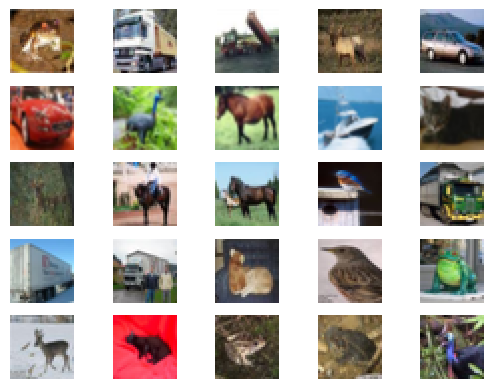

In [4]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
plt.show()


In [5]:
#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Build Discriminator Model:
    
    inputs: 28 * 28 pixels in size
    
    Output: Binary classification(real/fake)

In [6]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #1st conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    #converting higher dimes into one dimen
    model.add(Flatten())

    #output layer
    model.add(Dense(1,activation='sigmoid'))

    #Compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)

    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

    return model
model=discriminator()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

# Load & prepare the mnist training images

In [7]:
from numpy import expand_dims,ones,zeros
def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

load_real_samples()


array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [8]:
#select real images
from numpy.random import rand,randint
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    #generate 'real' class labels
    y=ones((n_samples,1))
    return x,y

generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.07843138],
           [0.12941177],
           [0.0627451 ]],
 
          [[0.0627451 ],
           [0.10980392],
           [0.04705882]],
 
          [[0.10980392],
           [0.15294118],
           [0.08235294]],
 
          ...,
 
          [[0.08627451],
           [0.1254902 ],
           [0.07843138]],
 
          [[0.05490196],
           [0.08627451],
           [0.03921569]],
 
          [[0.05098039],
           [0.07843138],
           [0.04705882]]],
 
 
         [[[0.06666667],
           [0.1254902 ],
           [0.07450981]],
 
          [[0.05490196],
           [0.09411765],
           [0.05098039]],
 
          [[0.08235294],
           [0.11372549],
           [0.07058824]],
 
          ...,
 
          [[0.07058824],
           [0.11372549],
           [0.06666667]],
 
          [[0.05490196],
           [0.09411765],
           [0.04705882]],
 
          [[0.08235294],
           [0.12156863],
           [0.07843138]]],
 
 
         [[[0.08627451],

In [9]:

# generate n fake samples with class labels
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)

    x=x.reshape(n_samples,32,32,3)

    #generate fake class labels
    y=zeros((n_samples,1))

    return x,y

generate_fake_samples(10)

(array([[[[0.07619417, 0.58535942, 0.3363925 ],
          [0.14153931, 0.98068646, 0.16921033],
          [0.4985472 , 0.76338429, 0.77151324],
          ...,
          [0.15353731, 0.08674597, 0.87548894],
          [0.83995916, 0.73328002, 0.0366752 ],
          [0.3700969 , 0.00203457, 0.54012845]],
 
         [[0.860622  , 0.47711282, 0.86601681],
          [0.96637749, 0.58312581, 0.10421612],
          [0.27600021, 0.41960934, 0.34580048],
          ...,
          [0.1235717 , 0.96096558, 0.08838235],
          [0.71756528, 0.34198112, 0.55669661],
          [0.43897018, 0.20754428, 0.05825573]],
 
         [[0.56395127, 0.00447599, 0.108339  ],
          [0.20940478, 0.72169979, 0.41947661],
          [0.41124584, 0.34345679, 0.5371537 ],
          ...,
          [0.37513833, 0.31813279, 0.63997569],
          [0.13821088, 0.45417458, 0.38890711],
          [0.84403713, 0.62407047, 0.71938537]],
 
         ...,
 
         [[0.40304143, 0.7252666 , 0.88785117],
          [0.58932

# Train the Discriminator model

In [10]:
def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//22)

    for i in range(n_iter):
        #get randomly selected 'real' images
        xreal,yreal=generate_real_samples(dataset,half_batch)

        #update discriminator on real images
        _,real_acc=model.train_on_batch(xreal,yreal)
        #generate 'fake' images
        xfake,yfake=generate_fake_samples(half_batch)

        #update discriminator fake samples

        _,fake_acc=model.train_on_batch(xfake,yfake)

        #summarize performance
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))



#define the discriminator model
model=discriminator()
#load image data
dataset=load_real_samples()

# Train the model

In [11]:
train_discriminator(model,dataset)


>1 real=45% fake=36%
>2 real=91% fake=18%
>3 real=36% fake=45%
>4 real=73% fake=45%
>5 real=55% fake=45%
>6 real=55% fake=9%
>7 real=55% fake=27%
>8 real=36% fake=9%
>9 real=64% fake=45%
>10 real=64% fake=55%
>11 real=55% fake=73%
>12 real=55% fake=36%
>13 real=45% fake=45%
>14 real=55% fake=45%
>15 real=27% fake=36%
>16 real=27% fake=64%
>17 real=36% fake=55%
>18 real=18% fake=45%
>19 real=36% fake=45%
>20 real=55% fake=82%
>21 real=27% fake=73%
>22 real=27% fake=73%
>23 real=45% fake=82%
>24 real=55% fake=64%
>25 real=55% fake=55%
>26 real=36% fake=55%
>27 real=55% fake=73%
>28 real=55% fake=73%
>29 real=36% fake=91%
>30 real=36% fake=64%
>31 real=36% fake=64%
>32 real=18% fake=91%
>33 real=18% fake=45%
>34 real=9% fake=73%
>35 real=45% fake=82%
>36 real=36% fake=91%
>37 real=36% fake=73%
>38 real=55% fake=100%
>39 real=64% fake=91%
>40 real=45% fake=91%
>41 real=36% fake=91%
>42 real=36% fake=82%
>43 real=27% fake=73%
>44 real=45% fake=100%
>45 real=18% fake=91%
>46 real=36% fake=10

# Generator model

In [12]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
# define the standalone generator model
def generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model



# define the size of the latent space
latent_dim = 100
# define the generator model
model = generator(latent_dim)
# summarize the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

In [13]:
# Combined Generator and Discriminator model (for training the generator)
def gan_model(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [14]:
import numpy as np
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input


In [15]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create ✬fake✬ class labels (0)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 127ms/step


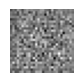

<Figure size 1000x800 with 0 Axes>

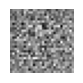

<Figure size 1000x800 with 0 Axes>

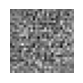

<Figure size 1000x800 with 0 Axes>

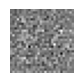

<Figure size 1000x800 with 0 Axes>

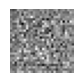

<Figure size 1000x800 with 0 Axes>

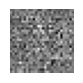

<Figure size 1000x800 with 0 Axes>

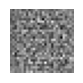

<Figure size 1000x800 with 0 Axes>

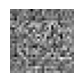

<Figure size 1000x800 with 0 Axes>

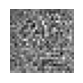

<Figure size 1000x800 with 0 Axes>

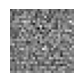

<Figure size 1000x800 with 0 Axes>

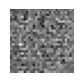

<Figure size 1000x800 with 0 Axes>

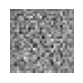

<Figure size 1000x800 with 0 Axes>

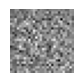

<Figure size 1000x800 with 0 Axes>

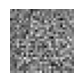

<Figure size 1000x800 with 0 Axes>

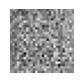

<Figure size 1000x800 with 0 Axes>

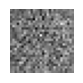

<Figure size 1000x800 with 0 Axes>

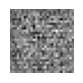

<Figure size 1000x800 with 0 Axes>

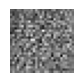

<Figure size 1000x800 with 0 Axes>

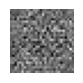

<Figure size 1000x800 with 0 Axes>

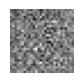

<Figure size 1000x800 with 0 Axes>

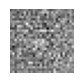

<Figure size 1000x800 with 0 Axes>

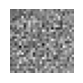

<Figure size 1000x800 with 0 Axes>

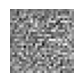

<Figure size 1000x800 with 0 Axes>

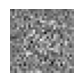

<Figure size 1000x800 with 0 Axes>

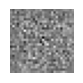

<Figure size 1000x800 with 0 Axes>

In [16]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = generator(latent_dim)
# generate samples
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    # show the figure
    plt.figure(figsize=(10,8))
    plt.show()


1/1 [==============================] - 0s 130ms/step


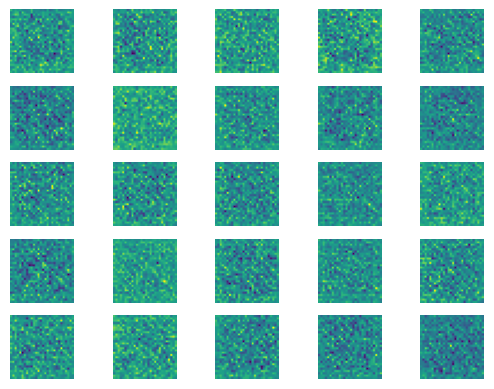

In [17]:
# Generate fake samples
n_samples = 25
generated_images, _ = generate_fake_samples(generator(latent_dim), latent_dim, n_samples)

for i in range(n_samples):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(generated_images[i])
plt.show()